1.Loading the DATASET

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score,
                             f1_score, roc_curve, auc)
from sklearn.multiclass import OneVsRestClassifier

# Load the dataset
file_path = '/content/drive/MyDrive/Datasets/cancer patient data sets.csv'
data = pd.read_csv(file_path)
print(data)
print(data.info())



     index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk

2.Data Preprocessing

In [ ]:
# Drop unnecessary columns
data_cleaned = data.drop(['index', 'Patient Id', 'Clubbing of Finger Nails', 'Air Pollution','Swallowing Difficulty','Gender'], axis=1)

# Encode the target variable 'Level'
label_encoder = LabelEncoder()
data_cleaned['Level'] = label_encoder.fit_transform(data_cleaned['Level'])  # Low = 0, Medium = 1, High = 2
print(data_cleaned)
print(data_cleaned.info())

     Age  Alcohol use  Dust Allergy  OccuPational Hazards  Genetic Risk  \
0     33            4             5                     4             3   
1     17            1             5                     3             4   
2     35            5             6                     5             5   
3     37            7             7                     7             6   
4     46            8             7                     7             7   
..   ...          ...           ...                   ...           ...   
995   44            7             7                     7             7   
996   37            8             7                     7             7   
997   25            5             6                     5             5   
998   18            8             7                     7             7   
999   47            5             6                     5             5   

     chronic Lung Disease  Balanced Diet  Obesity  Smoking  Passive Smoker  \
0                    

In [ ]:
# Split the dataset into features (X) and target (y)
X = data_cleaned.drop('Level', axis=1)
y = data_cleaned['Level']

# Optionally scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_model = GaussianNB(var_smoothing=1e-9)

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = nb_model.predict(X_test)

# Training and Testing Accuracy
train_accuracy = nb_model.score(X_train, y_train)
test_accuracy = nb_model.score(X_test, y_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the scores
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Training Accuracy: 0.84875
Testing Accuracy: 0.85
Confusion Matrix:
 [[79  0  3]
 [ 2 47  6]
 [10  9 44]]
Accuracy: 0.85
Precision: 0.8482470713249015
Recall: 0.85
F1 Score: 0.8462992671762853


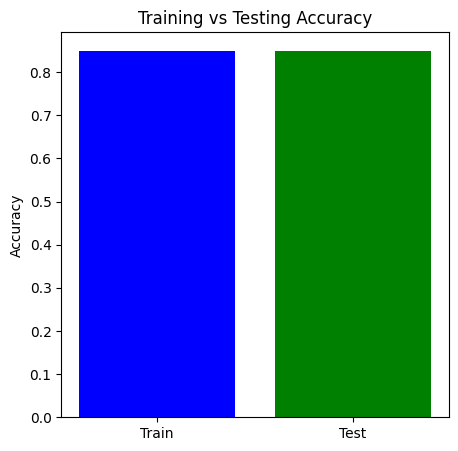

In [ ]:


# ---- Plot Training vs Testing Accuracy ----
plt.figure(figsize=(5,5))
plt.bar(['Train', 'Test'], [train_accuracy, test_accuracy], color=['blue', 'green'])
plt.title('Training vs Testing Accuracy')
plt.ylabel('Accuracy')
plt.show()

3.Feature Extraction  and Feature selection


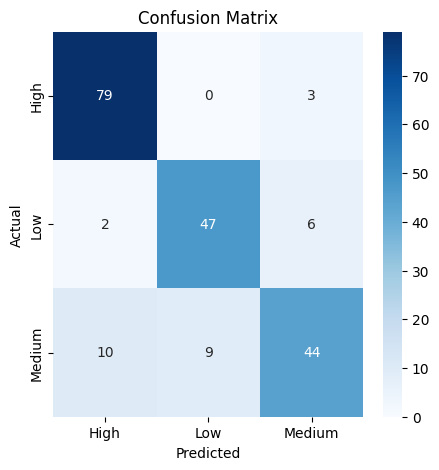

In [ ]:
# ---- Confusion Matrix Plot ----
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



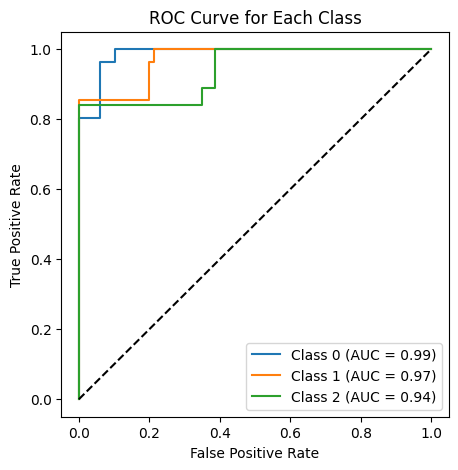

In [ ]:
# Binarize the labels for AUROC
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# One-vs-Rest (OvR) strategy for AUROC
classifier = OneVsRestClassifier(GaussianNB(var_smoothing=1e-9))
y_score = classifier.fit(X_train, label_binarize(y_train, classes=[0,1,2])).predict_proba(X_test)

# Compute AUROC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=[0, 1, 2])[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for Each Class
plt.figure(figsize=(5, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='best')
plt.show()

In [ ]:
import numpy as np
feature_importance = np.abs(log_reg.coef_).flatten()
print("Feature importance:", feature_importance)


Feature importance: [0.03349774 0.8659041  0.00590348 0.07714952 0.40533098 0.56625327
 0.32342304 0.62005612 0.36574145 1.34883726 0.04465698 0.99234261
 0.83314925 0.76420501 0.14254496 0.45197809 0.64682804 0.48335332
 0.21713612 0.02653462 0.22024564 0.30034862 0.03832892 0.76909975
 0.63259909 0.44147259 1.30425621 0.33913142 1.16213392 0.10777861
 1.07740587 0.49956114 0.25207098 0.07163212 1.37623824 1.22666457
 0.52670188 0.85866309 0.06003235 0.64565846 0.29444514 0.0388206
 0.36376877 0.06634583 0.76489564 0.68420009 0.02661004 0.18670334
 0.06312164 0.08506326 0.33358811 0.51213402 0.21417707 0.92426015
 0.57983653 0.04334856 0.64152697]


In [ ]:
from collections import Counter
print("Class distribution in y_train:", Counter(y_train))
print("Class distribution in y_test:", Counter(y_test))


Class distribution in y_train: Counter({0: 283, 2: 269, 1: 248})
Class distribution in y_test: Counter({0: 82, 2: 63, 1: 55})


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, log_reg.predict(X_test))
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[82  0  0]
 [ 0 55  0]
 [ 0  0 63]]


In [ ]:
import pandas as pd
corr_matrix = pd.DataFrame(X_train).corr().abs()
high_corr_var = np.where(corr_matrix > 0.95)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print("Highly correlated features (above 0.95):", high_corr_var)


Highly correlated features (above 0.95): []


In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
print("Class Weights:", dict(enumerate(class_weights)))


Class Weights: {0: 0.91324200913242, 1: 1.1019283746556474, 2: 1.0025062656641603}


In [ ]:
# Limit depth of decision tree or random forest
dt_model = DecisionTreeClassifier(max_depth=5)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5)


4. Classification

--- Naive Bayes ---
Accuracy: 0.8933333333333333
Precision: 0.8986304470854556
Recall: 0.8933333333333333
F1 Score: 0.8937034322797149
Confusion Matrix:
 [[113   0   6]
 [  4  74   6]
 [ 16   0  81]]


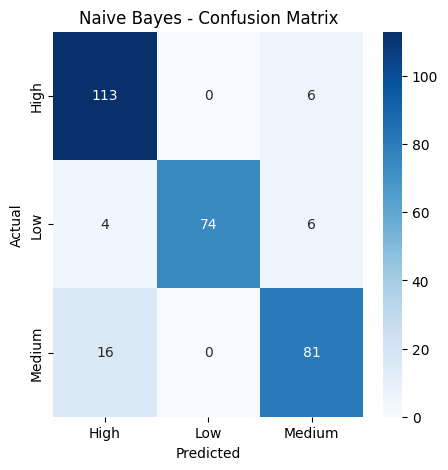

In [ ]:
# Import additional libraries for the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print performance metrics
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


#  Naive Bayes (already implemented earlier, just calling the function again)
evaluate_model(nb_model, X_train, X_test, y_train, y_test, "Naive Bayes")



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

In [ ]:
# Split the data into features (X) and target (y)
X = dataset.drop(['Level','Patient Id','index'], axis=1)  # Dropping 'Patient Id' and 'index' columns along with 'Level'
y = dataset['Level']

# Split the data into training and testing sets *after* dropping columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CART model
cart_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
cart_model.fit(X_train, y_train) # Now X_train contains only numerical features

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = cart_model.predict(X_test)

# Print the predictions
print("Predictions:",y_pred)

Predictions: ['Medium' 'Medium' 'Medium' 'High' 'Medium' 'Medium' 'Medium' 'Medium'
 'Medium' 'Medium' 'Low' 'Medium' 'Medium' 'Medium' 'Low' 'High' 'Low'
 'High' 'High' 'High' 'High' 'Medium' 'Low' 'Medium' 'High' 'Low' 'Medium'
 'High' 'Low' 'Low' 'Low' 'High' 'Medium' 'Low' 'Low' 'High' 'High'
 'Medium' 'High' 'Low' 'High' 'High' 'Low' 'Medium' 'Medium' 'Low' 'Low'
 'Medium' 'High' 'Low' 'Medium' 'High' 'Low' 'High' 'High' 'High' 'Low'
 'High' 'High' 'Low' 'Medium' 'Low' 'High' 'High' 'Low' 'Medium' 'High'
 'High' 'Medium' 'High' 'High' 'Low' 'Medium' 'Medium' 'Medium' 'Medium'
 'High' 'Low' 'Low' 'Medium' 'Medium' 'Medium' 'Low' 'Medium' 'High'
 'High' 'High' 'Low' 'High' 'High' 'Low' 'Low' 'Medium' 'High' 'High'
 'High' 'High' 'High' 'Medium' 'Low' 'Low' 'High' 'Low' 'Low' 'Medium'
 'High' 'High' 'Medium' 'Medium' 'Medium' 'Medium' 'High' 'High' 'Low'
 'Medium' 'High' 'Medium' 'High' 'Medium' 'Medium' 'High' 'High' 'Low'
 'Low' 'Medium' 'High' 'High' 'High' 'High' 'High' 'Low' 'Me

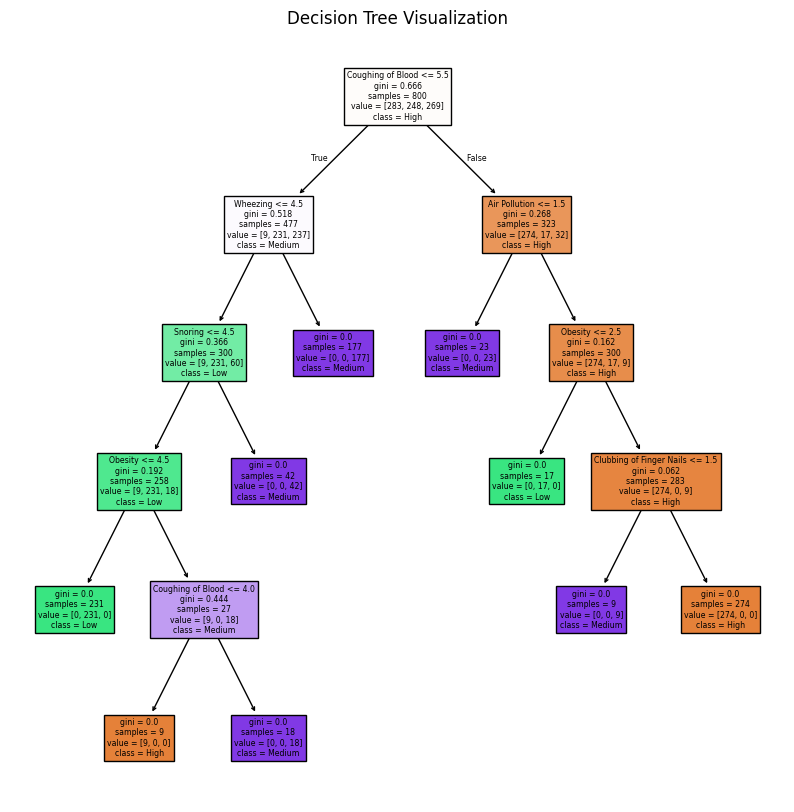

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(10, 10))

# Access feature names and target class names from the dataset and LabelEncoder
plot_tree(cart_model,
          filled=True,
          feature_names=X.columns,
          class_names=label_encoder.classes_)

plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
import numpy as np
from collections import Counter

# Function to calculate Euclidean distance
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

# Custom KNN function to predict for one data point
def knn_predict_single(X_train, y_train, input_values, k=5):
    distances = []
    # Calculate the distance between the input and each training point
    for i in range(len(X_train)):
        # Access row using .iloc[] for position-based indexing
        dist = euclidean_distance(X_train.iloc[i].values, input_values)
        distances.append((dist, y_train.iloc[i]))

    # Sort by distance and get k nearest neighbors
    distances.sort(key=lambda x: x[0])
    k_nearest_neighbors = [distances[i][1] for i in range(k)]

    # Majority vote
    most_common = Counter(k_nearest_neighbors).most_common(1)
    return most_common[0][0]

# Example input (for two input values)
def input_and_predict(X_train, y_train, k=5):
    print("Enter the two feature values to compare:")

    # Taking two feature values as input (for example Age and smoking)
    feature_1 = float(input("Enter the first feature value (e.g., Age): "))
    feature_2 = float(input("Enter the second feature value (e.g., smoking): "))

    # Create an input vector (based on the columns in your dataset, you need all feature values for comparison)
    # Assuming your input is just two features, we'll make the others zero or use a baseline value for simplicity.
    input_values = np.array([feature_1, feature_2] + [0] * (X_train.shape[1] - 2))  # Adjust according to the feature count

    # Predict class using custom KNN
    prediction = knn_predict_single(X_train, y_train4, input_values, k=k)
    print(f"Predicted class for input values is: {prediction}")

# Example usage with training data
input_and_predict(X_train,y_train,k=5)


Enter the two feature values to compare:
Enter the first feature value (e.g., Age): 2
Enter the second feature value (e.g., smoking): 4
Predicted class for input values is: Low


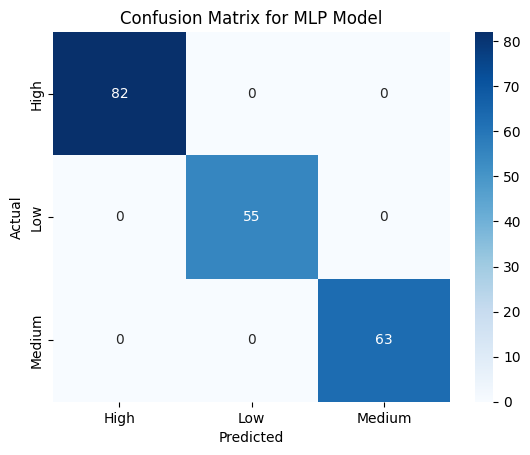

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for MLP Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
